# Machine Learning

*Yuriy Sverchkov*

**BMI 773 Clinical Research Informatics**

March 23, 2020

## Submodule learning objectives

* Students will be able to define the supervised learning task.
* Students will be able to explain how several supervised machine-learning algorithms work.
* Students will be able to select appropriate methodologies for evaluating the predictive accuracy of learned models.
* Students will be able to apply a supervised learning algorithm package to a health data set and evaluate the predictive accuracy of the learned model(s).

## Lecture Goals

* Define Machine Learning
* Define the supervised learning tasks
* Consider how to represent instances as fixed-length feature vectors
* Understand concepts
  * instance (example)
  * feature (attribute)
  * model (hypothesis)
  * training set
  * test set
  * supervised learning
  * classification
  * regression

* Describe how some widely-used machine learning methods work
* Describe how machine learning methods are trained and evaluated

## What is Machine Learning?

> The study of algorithms that improve their __performance__ at some __task__ with __experience__.

*(paraphrased from Mitchell, T. (1997) Machine Learning)*


### Example: breast cancer prediction

* __Task:__ given biopsy samples, classify samples as benign vs. malignant
* __Performance:__ minimize misclassifications
* __Experience:__ samples known to be benign and samples known to be malignant

## Supervised Learning

The supervised learning *task* is usually to learn a model that estimates the value of a *target* attribute given other attributes (*features*) of a sample.

* Classification - the target is *categorical* and takes one value out of a finite set
* Regression - the target is a number that can take values in some continuous range

**Supervised learning** refers to the case where the *experience* the algorithm recieves is samples with known target values.

Other types of learning could be

* Unsupervised - the algorithm sees samples without known target values
* Semi-supervised - the algorithm sees a mix of samples with and without target values
* Active learning - the algorithm chooses which samples to observe

### Training set
In supervised learning, the *experience* the algorithm recieves is samples with known target values. This is called a __training set__.

### Example: breast cancer prediction

* __Features:__ properties of images of cell nuclei
* __Target:__ *malignant* or *benign*
  * This is a *classification* task


For the breast cancer prediction task, we have the following form for the training set:

| Features: | radius | texture | perimiter | area | ... | | target class |
|------------|--------|---------|-----------|------|-----|----|----|
|$\mathbf x^{(1)} = \langle$ | 17.99, | 10.38, | 122.8, | 1001. | $\ldots$ | $\rangle$ | $y^{(1)}=$ Malignant |
|$\mathbf x^{(2)} = \langle$ | 20.57, | 17.77, | 132.9, | 1326. | $\ldots$ | $\rangle$ | $y^{(2)}=$ Malignant |
|$\mathbf x^{(3)} = \langle$ | 13.08, | 15.71, | 85.63, | 520. | $\ldots$ | $\rangle$ | $y^{(3)}=$ Benign |
| $\vdots$ | | | | | | | $\vdots$ |

This is a **fixed-length vector** representation for the features.

TODO: add another example

### Generalization

The primary objective in supervised learning is to find a model that is **generalizes** - one that accurately estimates $y$ for previously unseen $\mathbf x$.

> Is this sample that is not in my training set malignant?

### Supervised learning as function learning

In supervised learning our *task* is to learn a *model* that estimates the value of a *target* from *features* for each sample.
Mathematically, the model is expressed as a *function*:

$$ \overbrace{f}^\text{model}( \underbrace{\mathbf{x}}_{\text{features}} ) = \overbrace{\hat y}^{\text{estimate of target}} $$

* Our task is to learn a function $f$ that yields accurate estimates $\hat y$.
* Which function $f$ *minimizes* the mismatch between $y$ and $\hat y$?
* The mismatch is often expressed as a **cost function** $\textrm{cost}(y, \hat y)$.

## Logistic Regression

* Logistic regression is a model used in binary classification
* In binary classification there are two possible values for the target variable $y$, which we can assign to the values 0 and 1
* The model then takes the form

$$ \text{Probability}(y=1)
= \mathrm{expit}(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d)
= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d )}} $$

* The learning task consists of finding the right **parameters** (in this case also *weights*) $\beta_0, \beta_1, \beta_2, \ldots, \beta_d$

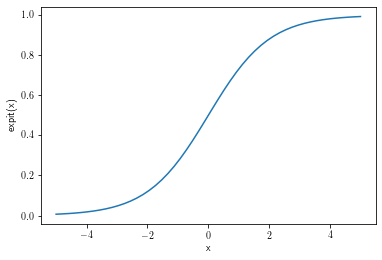

In [3]:
# Load numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
import matplotlib
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['backend'] = 'agg'

#%matplotlib ipympl

# Plot expit
x = np.linspace(-5,5,50)
y = expit(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('expit(x)')
plt.show()

# point out the parameters
# how to learn -- what is the cost function?
# run on breast cancer data


As an aside, when logistic regression is used as a regression analysis tool in statistics, the goal is to obtains estimates of the $\beta$ coefficients.

* The model is fit to the entirety of a collected dataset
* The coefficients are interpreted

When we view LR as a machine learning method, our goal is somewhat different: we want to learn a classifier that generalizes well to unseen instances.

* The model is fit to a training set
* We evaluate how well the model generalizes using a test set

The cost function used in learning a logistic regression model is called the **cross-entropy loss**, specifically:

$$ \mathrm{cost}(y, \hat y) =
 \begin{cases}
  -\log( \hat y ) & \text{ if }y=1 \\
  -\log( 1-\hat y ) & \text{ if }y=0
 \end{cases} $$

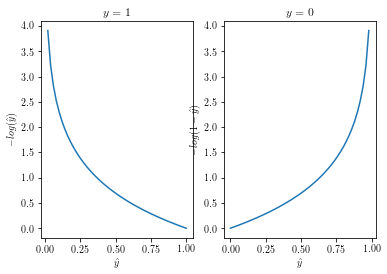

In [6]:
# Plot loss function for y=1, y=0
x1 = np.linspace(1, 0, 50, endpoint=False)
y1 = -np.log(x1)
x0 = 1-x1
y0 = -np.log(1-x0)

ax1 = plt.subplot(1,2,1)
ax1.plot(x1, y1)
ax1.set_xlabel(r'$\hat y$')
ax1.set_ylabel(r'$-log(\hat y)$')
ax1.set_title(r'$y=1$')

ax2 = plt.subplot(1,2,2)
ax2.plot(x0, y0)
ax2.set_xlabel(r'$\hat y$')
ax2.set_ylabel(r'$-log(1-\hat y)$')
ax2.set_title(r'$y=0$')

plt.show()


In [ ]:
# Load Breast Cancer Data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

### Examples
(todo)

In [38]:

from sklearn.linear_model import LogisticRegression




print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [50]:
(data.data[[0,1,20],0:4], data.target[[0,1,20]])

(array([[  17.99,   10.38,  122.8 , 1001.  ],
        [  20.57,   17.77,  132.9 , 1326.  ],
        [  13.08,   15.71,   85.63,  520.  ]]),
 array([0, 0, 1]))

In [20]:
lr1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter = 1000).fit(data.data, data.target)

NameError: name 'np' is not defined

In [34]:
import numpy as np
order = (-np.abs(lr.coef_)).argsort()
top2f = order[0,0:2]

array([18.69375933])

### Mathematical notation

The model that is learned in logistic regression has the form:

$logit(p) = \beta x$

Note the simple structure of the model: features are multiplied by weights and summed, then, a function is applied to transform the result.

Let's look at the logit function more closely:

In [2]:
# Plot logit here

This function has an unbounded domain (goes all the way fron $-\infty$ to $+\infty$) and a range from 0 to 1.

Note that it is also *monotonically increasing*, that is, if $a > b$ then $logit(a) > logit(b)$.

This property makes it particularly easy to interpret what the weights mean: higher positive weights mean that x correlates with y, weights near 0 mean that x does not affect y much, and hight negative weights 

### LR as optimization
The task of learning a logistic regression can be viewed as an *optimization problem*.

**Optimization** is the act? study? (TODO:look up) of finding the maximum or minimum of some function.

In LR, we want to find $\beta$ that minimizes
$$ todo formula here $$
This is also called the *cross-entropy*.

Most machine learning model learning can be viewed as an optimization problem where the task is to find some parameters that minimize a cost function.

In [1]:
# 3d plot of logistic regression on 2 variables --
# different angles show (a) the shape of the logit function
# (b) the linear separator
# (c) the x-beta line.

## Artificial Neural Networks

Artificial neural networks have seen much success in recent years.

[find examples]

### The structure of a neural network

[image]

### LR as a neural network

In logistic regression we have our input vector $x$, the inputs are multiplied by weights $\beta$, the result is transformed by a nonlinear function (the expit).
This can be expressed as a neural network with no hidden layers:

[image]

### ANN as optimization

Like with LR, learning an ANN is an optimization task:

* cost function

### A second look at examples?

### (optional) Network structure tailored to the task

* Hierarchical networks
* CNN
* RNN (very maybe)

## Decision trees

[image of a decision tree]

What is the optimization problem?

A greedy optimisation strategy (greedy strategies are not always perfect)



## ML pitfalls

- A. Bissoto, M. Fornaciali, E. Valle, and S. Avila, “(De)Constructing Bias on Skin Lesion Datasets,” presented at the IEEE Conference on Computer Vision and Pattern Recognition Workshops, 2019, p. 9.
- S. G. Finlayson, J. D. Bowers, J. Ito, J. L. Zittrain, A. L. Beam, and I. S. Kohane, “Adversarial attacks on medical machine learning,” Science, vol. 363, no. 6433, pp. 1287–1289, Mar. 2019, doi: 10.1126/science.aaw4399.
- R. Caruana, Y. Lou, J. Gehrke, P. Koch, M. Sturm, and N. Elhadad, “Intelligible Models for HealthCare: Predicting Pneumonia Risk and Hospital 30-day Readmission,” in Proceedings of the 21th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining - KDD ’15, Sydney, NSW, Australia, 2015, pp. 1721–1730, doi: 10.1145/2783258.2788613.
